In [1]:
import cv2
import torch
import numpy as np
from bm3d import bm3d
from btb import fast_iterative_denoising_btb
from denoisers import denoiser_bm3d, denoiser_ffcnn 

#delete
import matplotlib.pyplot as plt
from skimage import img_as_float, io, restoration

In [ ]:



print("Choose the model to use in Fast Interative Denoising:")
print("1. FFCNN")
print("2. BM3D")
input_model = input("Enter the number of the model: ")


img_path = input("Enter the path of the noisy image: ")
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
noisy_img = image.astype(np.float32) / 255.0  # Normalize image to [0,1]

# Convert image to PyTorch tensor
noisy_img_tensor = torch.from_numpy(noisy_img).permute(2, 0, 1).unsqueeze(0).float()

if input_model == "1":
    model_path = input("Select the path of your .pth file: ")
    denoiser = lambda img: denoiser_ffcnn(img, model_path)  # Pass model_path dynamically

elif input_model == "2":
    denoiser = denoiser_bm3d  # Use BM3D function directly

mu_sequence = np.linspace(0.1, 0.2, 10)
T = 10
delta = 1e-4

# Apply the Fast Iterative Denoising Algorithm (BTB)
denoised_image = fast_iterative_denoising_btb(noisy_img_tensor, denoiser, mu_sequence, T, delta)


SyntaxError: unterminated string literal (detected at line 6) (839515238.py, line 6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.010501663..0.9729817].


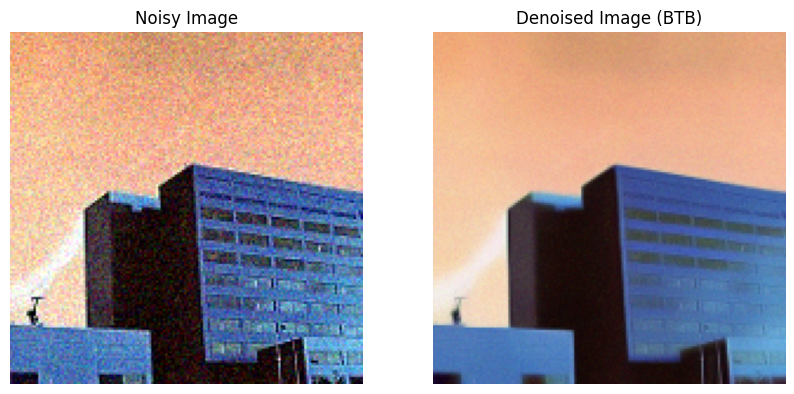

In [9]:
import matplotlib.pyplot as plt

# Convert PyTorch tensor to NumPy and reshape
denoised_image_np = denoised_image.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)  # Assuming noisy_img is already a NumPy array
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image_np)  # Now in the correct shape
plt.title('Denoised Image (BTB)')
plt.axis('off')

plt.show()
